In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pd.set_option('display.max_rows', 200)

### Read in loan data from 2007 to 2015. The data has been split into 21 different files so that they can pushed to Github

In [2]:
def read_loan_data():
    """Read in data from 21 files and concatentate into one dataframe"""
    dataframes = []
    for i in range(21):
        filename = './data/LoanStats_2007_to_2015_' + str(i) + '.csv'
        df = pd.read_csv(filename, low_memory=False)
        dataframes.append(df)
    loans = pd.concat(dataframes)
    return loans

In [3]:
loans = read_loan_data()

In [4]:
loans.shape

(887449, 143)

In [5]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some exploratory data analysis

### What kind of interest rate are borrowers paying?

In [6]:
# Remove 9 loans with missing interest rates. These were never funded
loans = loans[loans.int_rate.notnull()]

In [7]:
# Strip out % and convert to float
loans.int_rate = loans.int_rate.apply(lambda x: float(x.rstrip('%')))

In [8]:
loans.int_rate.describe()

count    887440.000000
mean         13.245705
std           4.382385
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

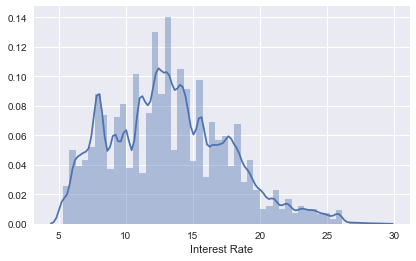

In [9]:
sns.distplot(loans.int_rate, axlabel='Interest Rate');

### How long are the loan terms?

In [10]:
loans.term.value_counts()

 36 months    621169
 60 months    266271
Name: term, dtype: int64

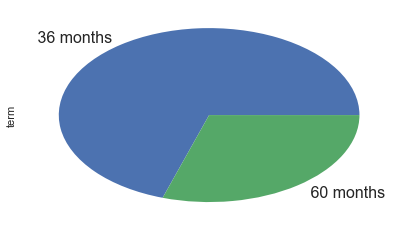

In [11]:
loans.term.value_counts().plot(kind='pie', fontsize=16);

### How much are people borrowing?

In [12]:
loans.loan_amnt.describe()

count    887440.000000
mean      14755.167673
std        8435.379336
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

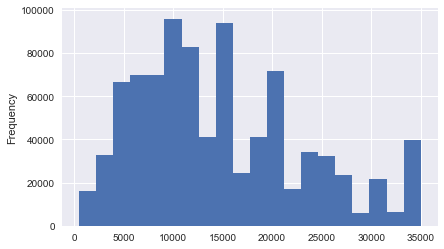

In [13]:
loans.loan_amnt.plot(kind='hist', bins=20, x='Loan Amount');

Seems like people like to round up to multiples of 5k such as 10k and 15k when applying.

### What are people taking these loans out for?

In [14]:
purposes = loans.purpose.value_counts()
purposes

debt_consolidation    524253
credit_card           206194
home_improvement       51834
other                  42896
major_purchase         17277
small_business         10378
car                     8864
medical                 8541
moving                  5415
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

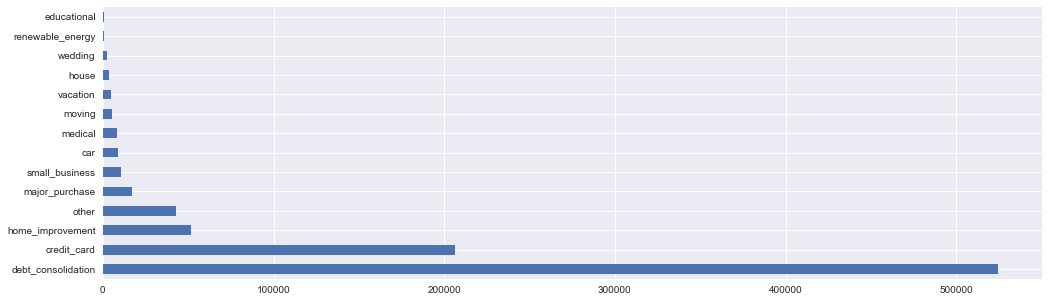

In [15]:
purposes.plot.barh(figsize=(15, 5));

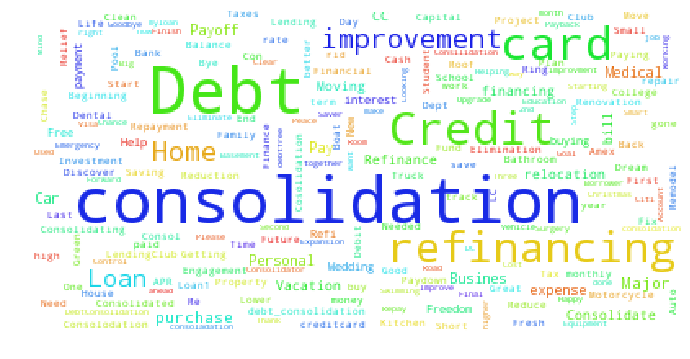

In [16]:
titles = loans.title.str.cat(sep=',')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_font_size=40, relative_scaling=0.5)
wordcloud.generate(titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Are the borrowers renters or homeowners?

In [17]:
loans.home_ownership.value_counts()

MORTGAGE    443591
RENT        356136
OWN          87478
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [18]:
loans.loc[(loans.home_ownership == 'ANY') | (loans.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'

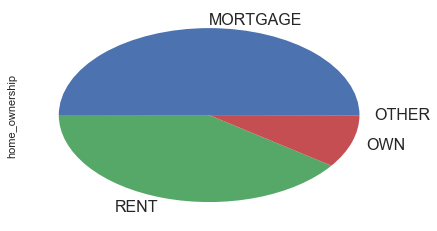

In [19]:
loans.home_ownership.value_counts().plot(kind='pie', fontsize=16);

### LendingClub rates their loans from A to G, with subgrades 1 to 5

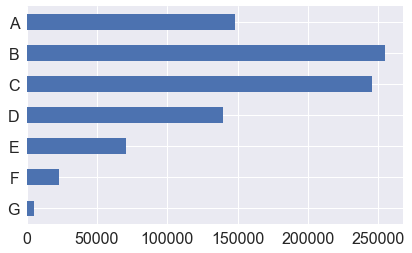

In [20]:
loans.grade.value_counts().sort_index(ascending=False).plot(kind='barh', fontsize=16);

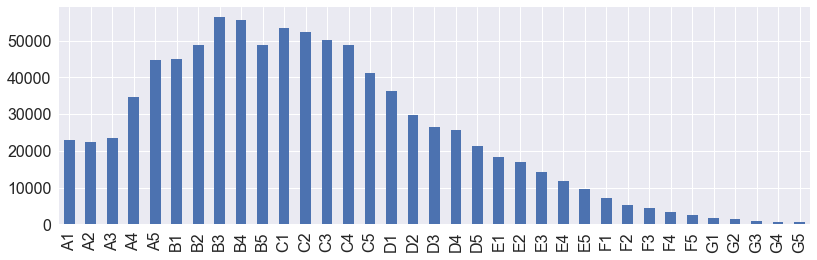

In [21]:
loans.sub_grade.value_counts().sort_index().plot(kind='bar', fontsize=16, figsize=(12, 4));

### Where do these borrowers live?

In [ ]:
loans.addr_state.value_counts() #  51 states including DC as it's own

In [ ]:
loans.zip_code.value_counts()

In [ ]:
import vincent
vincent.core.initialize_notebook()

In [ ]:
"""
import json
with open('maps/us_counties.topo.json') as counties_file:    
    county_topo = json.load(counties_file)
with open('maps/us_states.topo.json') as states_file:
    state_topo = json.load(states_file)
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'},
            {'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}
             ]

vis = vincent.Map(geo_data=geo_data, scale=200)
"""

### We want to predict whether a borrower will default or not

In [22]:
loans.loan_status.value_counts()

Fully Paid                                             453555
Current                                                295717
Charged Off                                            116280
Late (31-120 days)                                      10079
In Grace Period                                          6513
Late (16-30 days)                                        2536
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    11
Name: loan_status, dtype: int64

In [23]:
loans['defaulted'] = loans.loan_status.map({'Fully Paid': 0,
                                            'Current': 0,
                                            'Charged Off': 1,
                                            'Late (31-120 days)': 1,
                                            'In Grace Period': 0,
                                            'Late (16-30 days)': 0,
                                            'Does not meet the credit policy. Status:Fully Paid': 0,
                                            'Does not meet the credit policy. Status:Charged Off': 1,
                                            'Default': 1
                                           })

In [24]:
loans = loans.drop('loan_status', axis=1)

### What are our predictors?

In [25]:
# Member id and loan URL can be removed
loans = loans.drop(['url', 'member_id'], axis=1)

In [26]:
loans.application_type.value_counts()

INDIVIDUAL    886929
JOINT            511
Name: application_type, dtype: int64

In [27]:
# Since there are only 511 Joint accounts, let's remove them to simplify our analysis
loans = loans[loans.application_type == 'INDIVIDUAL']
joint_app_columns = ['revol_bal_joint', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                     'sec_app_num_rev_accts', 'sec_app_mths_since_last_major_derog', 'sec_app_fico_range_high',
                     'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
                     'sec_app_revol_util', 'sec_app_open_il_6m', 'sec_app_chargeoff_within_12_mths',
                     'sec_app_collections_12_mths_ex_med', 'sec_app_fico_range_low']
loans = loans.drop(joint_app_columns, axis=1)

In [28]:
# Remove policy code since it is 1 for all rows
loans = loans.drop('policy_code', axis=1)

In [29]:
# last_credit_pull_d => The most recent month LC pulled credit for this loan. Remove since it's irrelevant
loans = loans.drop('last_credit_pull_d', axis=1)

In [30]:
# Fico is pulled multiple times while loan is being invested. Take the mean of high and low
loans['fico'] = (loans.fico_range_low + loans.fico_range_high) / 2
loans = loans.drop(['fico_range_low', 'fico_range_high'], axis=1)

In [31]:
# Find all the columns with null values
loans.isnull().sum().sort_values(ascending=False)

orig_projected_additional_accrued_interest    886374
hardship_status                               886297
payment_plan_start_date                       886297
hardship_type                                 886297
hardship_reason                               886297
deferral_term                                 886297
hardship_amount                               886297
hardship_end_date                             886297
hardship_start_date                           886297
hardship_length                               886297
hardship_dpd                                  886297
hardship_loan_status                          886297
hardship_payoff_balance_amount                886297
hardship_last_payment_amount                  886297
il_util                                       868453
mths_since_rcnt_il                            866281
total_bal_il                                  865720
open_il_6m                                    865720
open_il_12m                                   

### Lots of null values, drop columns where 80% or more of the values are null

In [ ]:
num_rows = loans.shape[0]
threshold = int(num_rows * 0.8)
loans = loans.dropna(axis=1, thresh=threshold)
loans.shape

In [ ]:
loans.loan_status.value_counts()

In [ ]:
null_value_count = loans.isnull().sum().sort_values(ascending=False)

In [ ]:
cutoff = 887449 * 0.8;
columns_to_remove = []
for column, null_values in null_value_count.iteritems():
    if null_values > cutoff:
        columns_to_remove.append(column)
        print column, null_values

In [ ]:
loans.desc.head()

In [ ]:
loans.url.head()

In [ ]:
loans.title.head(100)

In [ ]:
cutoff = loans.shape[0] * 0.8;
df = loans.dropna(axis=1, thresh=cutoff)
df.shape

In [ ]:
df.columns

In [ ]:
loans.application_type.value_counts()

In [ ]:
loans['fico'] = (loans.fico_range_low + loans.fico_range_high) / 2

In [ ]:
loans.loc[:, ['fico_range_low', 'fico_range_high', 'fico']].head(20)

In [ ]:
loans = loans.drop(['fico_range', 'fico_range_low', 'fico_range_high'], axis=1)

In [ ]:
loans.columns

In [ ]:
loans.loan_status.value_counts()

In [ ]:
loans = loans[(loans.loan_status != 'Does not meet the credit policy. Status:Charged Off') & (loans.loan_status != 'Does not meet the credit policy. Status:Fully Paid')]

In [ ]:
loans.loan_status.value_counts()

In grace period means less than 15 days.

In [ ]:
# In grace period means 
#loans['defaulted'] = 

### For the purposes of this analysis we'll only look at loans that have had at least two years